In [64]:
%store -r log_recall 
%store -r log_AP
%store -r log_f1

%store -r svc_AP
%store -r svc_f1
%store -r svc_recall


%store -r rf_recall 
%store -r rf_AP
%store  -r rf_f1

%store -r xgb_recall 
%store -r xgb_AP
%store -r xgb_f1


%store -r cat


%store -r X
%store -r y

%store -r x_test
%store -r y_test

%store -r x_train
%store -r y_train

%store -r scoring


In [2]:
import pandas as pd


compare = pd.DataFrame(
       {
        "Model": ["Logistic Regression", "SVM", "Random Forest", "XGBoost"],
        "F1": [log_f1[0], svc_f1[0], rf_f1[0], xgb_f1[0]],
        "Recall": [log_recall[0], svc_recall[0], rf_recall[0], xgb_recall[0]],
        "AP": [log_AP, svc_AP, rf_AP, xgb_AP],
    }
)

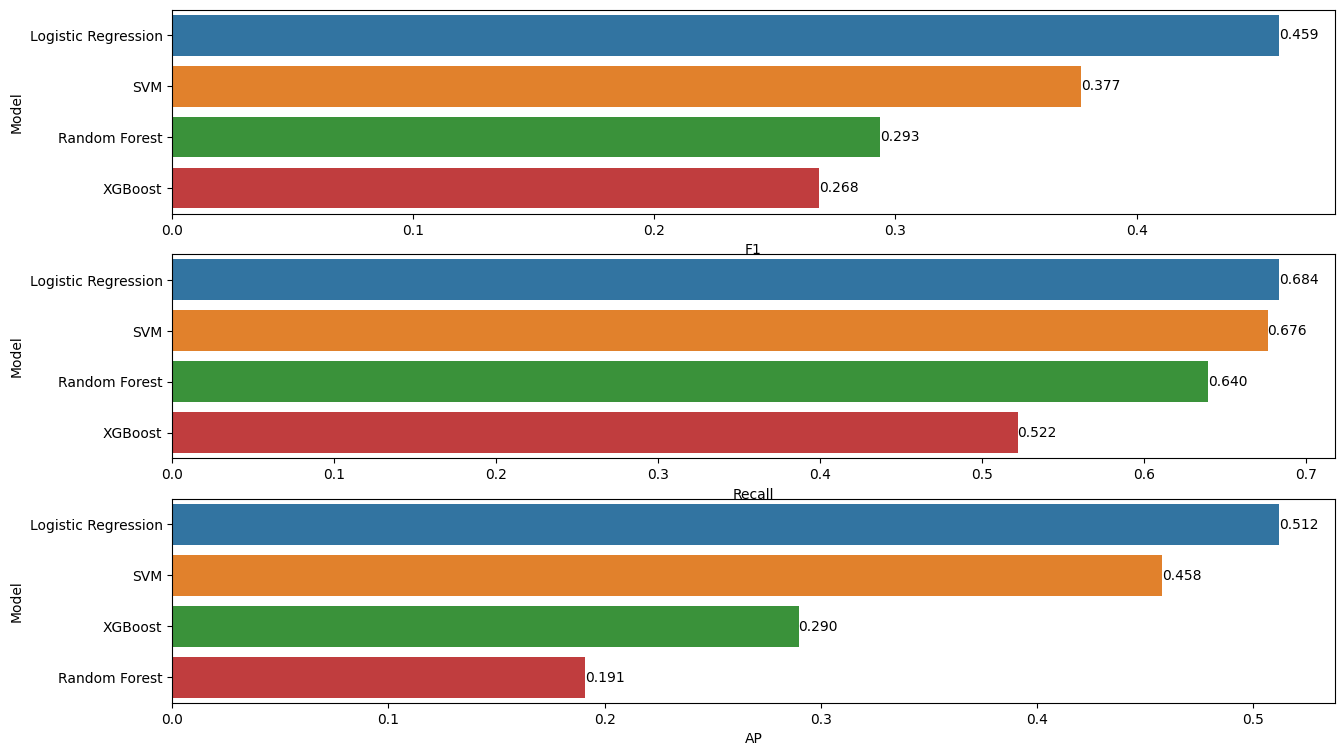

In [3]:
from matplotlib import pyplot as plt
import seaborn as sns


plt.figure(figsize=(15,9))

plt.subplot(311)
compare = compare.sort_values(by="F1", ascending=False)
ax = sns.barplot(x="F1", y="Model", data=compare)
ax.bar_label(ax.containers[0], fmt="%.3f")


plt.subplot(312)
compare = compare.sort_values(by="Recall", ascending=False)
ax = sns.barplot(x="Recall", y="Model", data=compare)
ax.bar_label(ax.containers[0], fmt="%.3f")


plt.subplot(313)
compare = compare.sort_values(by="AP", ascending=False)
ax = sns.barplot(x="AP", y="Model", data=compare)
ax.bar_label(ax.containers[0], fmt="%.3f")

plt.show();

# Before the Deployment
- Choose the model that works best based on your chosen metric
- For final step, fit the best model with whole dataset to get better performance.
- And your model ready to deploy, dump your model and scaler.

In [4]:
from sklearn.compose import make_column_transformer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder


col_trans_final = make_column_transformer(
    (OneHotEncoder(handle_unknown="ignore", sparse_output=False), cat),
    remainder=MinMaxScaler(),
)
operations_final = [
    ("OneHotEncoder", col_trans_final),(
        "log",
        LogisticRegression(class_weight="balanced", max_iter=10000, random_state=101),
    )
]

best_model = Pipeline(steps=operations_final)

In [5]:
best_model.fit(X, y)

Pipeline(steps=[('OneHotEncoder',
                 ColumnTransformer(remainder=MinMaxScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  Index(['Gender', 'WritingPreference'], dtype='object'))])),
                ('log',
                 LogisticRegression(class_weight='balanced', max_iter=10000,
                                    random_state=101))])

In [7]:
X[X.Gender == "Male"].describe()
# We will make predictions on the model based on the average
# values of all male soldiers in our data.

,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,...,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Age,Heightin,Weightlbs
count,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.00000,3899.000000,3899.000000,3899.000000,3899.000000,...,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000
mean,255.449090,1442.946397,335.819441,229.590921,1331.098487,252.16594,201.229546,416.004360,358.579636,275.632213,...,943.043344,238.560400,388.017440,1058.239805,858.714286,176.168761,848.762247,30.172352,70.122083,188.765324
std,37.295117,62.356906,17.281413,14.579399,58.714251,12.89351,10.329358,19.074837,34.511924,17.512428,...,111.463219,34.730231,29.360557,51.599179,141.506945,8.855214,41.138763,8.835481,2.922019,29.782236
min,163.000000,1194.000000,270.000000,156.000000,1106.000000,186.00000,156.000000,337.000000,246.000000,219.000000,...,648.000000,161.000000,293.000000,876.000000,393.000000,149.000000,695.000000,18.000000,60.000000,0.000000
25%,228.000000,1401.000000,324.000000,220.000000,1291.000000,244.00000,194.000000,403.000000,335.000000,263.000000,...,859.000000,212.000000,368.000000,1023.000000,760.000000,170.000000,820.000000,23.000000,68.000000,169.000000
50%,252.000000,1441.000000,335.000000,229.000000,1330.000000,252.00000,201.000000,415.000000,358.000000,275.000000,...,940.000000,235.000000,387.000000,1057.000000,849.000000,176.000000,848.000000,28.000000,70.000000,185.000000
75%,280.000000,1483.000000,347.000000,239.000000,1368.000000,261.00000,208.000000,428.000000,380.000000,288.000000,...,1018.000000,261.000000,407.000000,1092.000000,947.000000,182.000000,875.000000,36.500000,72.000000,209.000000
max,451.000000,1683.000000,393.000000,293.000000,1553.000000,306.00000,245.000000,489.000000,490.000000,334.000000,...,1379.000000,406.000000,494.000000,1245.000000,1442.000000,216.000000,1009.000000,58.000000,94.000000,321.000000


In [8]:
male_mean_human = X[X.Gender == "Male"].describe(include="all").loc["mean"]
male_mean_human

abdominalextensiondepthsitting      255.44909
acromialheight                    1442.946397
acromionradialelength              335.819441
anklecircumference                 229.590921
axillaheight                      1331.098487
                                     ...     
Gender                                    NaN
Age                                 30.172352
Heightin                            70.122083
Weightlbs                          188.765324
WritingPreference                         NaN
Name: mean, Length: 98, dtype: object

In [9]:
male_mean_human["Gender"] = "Male"
male_mean_human["SubjectsBirthLocation"] = "California"
male_mean_human["WritingPreference"] = "Right hand"

In [10]:
pd.set_option("display.max_columns", 1000)

pd.DataFrame(male_mean_human).T


,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,Age,Heightin,Weightlbs,WritingPreference,SubjectsBirthLocation
mean,255.44909,1442.946397,335.819441,229.590921,1331.098487,252.16594,201.229546,416.00436,358.579636,275.632213,510.927674,74.844063,331.655809,315.718389,142.434983,1021.294178,246.362401,889.500385,619.217235,504.001026,392.42652,1519.42216,289.786868,1060.496794,254.3901,1293.040267,847.637599,623.143114,356.354706,36.095153,64.17107,23.109772,244.823544,804.885099,101.893819,271.573993,349.57348,310.528084,580.702231,480.928956,1132.125673,88.379841,212.571172,193.509361,154.183637,574.70813,199.760708,344.002052,72.564504,346.256732,379.948448,1063.41267,639.948705,431.393947,450.628623,489.366504,555.224929,492.625545,73.061554,409.670685,122.684534,398.192101,435.159528,1428.469351,116.610156,430.684791,268.313927,1179.902539,364.305976,149.832265,918.678636,897.179277,594.007951,1816.628879,1758.385483,1440.699667,1122.444473,626.335214,180.73942,813.085407,469.222878,131.116697,902.586817,1666.783278,478.017953,327.110798,943.043344,238.5604,388.01744,1058.239805,858.714286,176.168761,848.762247,Male,30.172352,70.122083,188.765324,Right hand,California


In [11]:
best_model.predict(pd.DataFrame(male_mean_human).T)

# we can say that the average values of male soldiers are very
# close to Hispanic soldiers.

array(['White'], dtype=object)

In [14]:
from sklearn.metrics import matthews_corrcoef

y_pred = best_model.predict(x_test)
matthews_corrcoef(y_test, y_pred)


# Accuracy is an unreliable metric for unstable datasets. For this reason,
# matthews_corrcoef and cohen_kappa_score can be used for accuracy of
# imbalanced datasets.


0.683989424726695

In [13]:
from sklearn.metrics import cohen_kappa_score
cohen_kappa_score(y_test, y_pred)

0.6662410568628914

## SMOTE to balance the data

In [17]:
from imblearn.over_sampling import SMOTE

# equalizes or converges the majority class to the minority class
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as imbpipeline

# imblearn.pipeline is different from the pipeline library of the sklearn library.
# While the sklearn pipeline only runs the fit, transform, predict and predict_proba functions,
# imblearn.pipeline also runs the resample function.

In [18]:
col_trans = make_column_transformer(
    (OneHotEncoder(handle_unknown="ignore", sparse_output=False), cat),
    remainder=MinMaxScaler(),
)

In [24]:
x_train_ohe = col_trans.fit_transform(x_train)

# manually transform X_train and X_test' one hot encoder.

In [26]:
# we will apply oversampling (SMOTE) to x_train and y_train only 
# If it is applied to all the data and then separated into data train and test set,
# data_leakage will occur and your scores will overestimated.
# The data should be split into train and test set first and then applied only to the train data.

over_samp = SMOTE()
x_train_over, y_train_over = over_samp.fit_resample(x_train_ohe, y_train)


In [37]:
print("Data before apply SMOTE :", y_train.value_counts())
print("Data After apply SMOTE :", y_train_over.value_counts())


Data shape before apply SMOTE : DODRace
White       3034
Black       1038
Hispanic     543
Name: count, dtype: int64
Data shape After apply SMOTE : DODRace
White       3034
Black       3034
Hispanic    3034
Name: count, dtype: int64


In [ ]:
# As you can see, all classes after smote are equal to the number of
# observations of the majority class, white.


In [ ]:

# However, equating or approximating the minority class to the majority
# class will result in overfitting of the model. Therefore, the number of observations
# belonging to the minority class should be increased in a controlled manner
# to avoid overfitting.

In [39]:
under_samp = RandomUnderSampler()
x_train_under, y_train_under = under_samp.fit_resample(x_train_ohe,y_train)

In [40]:
x_train_under.shape

(1629, 101)

In [42]:
print("Data  before apply RandomUnderSampler() :", y_train.value_counts())
print("Data  After apply RandomUnderSampler() :", y_train_under.value_counts())

Data shape before apply RandomUnderSampler() : DODRace
White       3034
Black       1038
Hispanic     543
Name: count, dtype: int64
Data shape After apply RandomUnderSampler() : DODRace
Black       543
Hispanic    543
White       543
Name: count, dtype: int64


In [43]:
over_samp = SMOTE(sampling_strategy={"Hispanic":1000})
under_samp = RandomUnderSampler(sampling_strategy={"White":2500})
# With the sampling_strategy hyperparameter, we can increase or decrease
# the classes however we want.

In [46]:
y_train.value_counts()

DODRace
White       3034
Black       1038
Hispanic     543
Name: count, dtype: int64

In [47]:
x_resampled_over, y_resampled_over = over_samp.fit_resample(x_train_ohe,y_train)

In [50]:
y_resampled_over.value_counts()

DODRace
White       3034
Black       1038
Hispanic    1000
Name: count, dtype: int64

In [51]:
x_resampled_under, y_resampled_under = under_samp.fit_resample(x_train_ohe,y_train)

In [52]:
y_resampled_under.value_counts()

DODRace
White       2500
Black       1038
Hispanic     543
Name: count, dtype: int64

In [53]:
# We automate our over_sampling and under_sampling processes.
steps = [("over", over_samp), ("under", under_samp)]

pipe = imbpipeline(steps=steps)

# First the number of hispanic cals will be increased to 1000 as per our instruction,
# and then the white class will be reduced to 2500.

x_resampled, y_resampled = pipe.fit_resample(x_train_ohe, y_train)


In [54]:
y_resampled.value_counts()

DODRace
White       2500
Black       1038
Hispanic    1000
Name: count, dtype: int64

## Logistic Regression Over/Under Sampling

In [55]:
col_trans = make_column_transformer(
    (OneHotEncoder(handle_unknown="ignore",sparse_output=False),cat),   
    remainder=MinMaxScaler(),
)


In [56]:
operations = [
    ("OneHotEncoder", col_trans),
    ("over_samp",over_samp),
    ("under",under_samp),
    ("log", LogisticRegression())
]

# When over or under sampling is applied to data, class_weight="balanced" is never used.

In [57]:
smote_pipe=imbpipeline(steps=operations)

In [58]:
smote_pipe.fit(x_train, y_train)

c:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('OneHotEncoder',
                 ColumnTransformer(remainder=MinMaxScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  Index(['Gender', 'WritingPreference'], dtype='object'))])),
                ('over_samp', SMOTE(sampling_strategy={'Hispanic': 1000})),
                ('under',
                 RandomUnderSampler(sampling_strategy={'White': 2500})),
                ('log', LogisticRegression())])

In [61]:
from sklearn.metrics import classification_report, confusion_matrix


def eval (model, x_train, y_train,x_test, y_test):
    y_train_pred = model.predict(x_train)
    y_pred = model.predict(x_test)

    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [62]:
eval(smote_pipe, x_train, y_train, x_test, y_test)

Test_Set
[[231  20   9]
 [  9  74  53]
 [  6  59 693]]
              precision    recall  f1-score   support

       Black       0.94      0.89      0.91       260
    Hispanic       0.48      0.54      0.51       136
       White       0.92      0.91      0.92       758

    accuracy                           0.86      1154
   macro avg       0.78      0.78      0.78      1154
weighted avg       0.87      0.86      0.87      1154


Train_Set
[[ 929   41   68]
 [  48  292  203]
 [  43  182 2809]]
              precision    recall  f1-score   support

       Black       0.91      0.89      0.90      1038
    Hispanic       0.57      0.54      0.55       543
       White       0.91      0.93      0.92      3034

    accuracy                           0.87      4615
   macro avg       0.80      0.79      0.79      4615
weighted avg       0.87      0.87      0.87      4615



In [65]:
from sklearn.model_selection import cross_validate


model = imbpipeline(steps=operations)

scores = cross_validate(
    model, x_train, y_train, scoring=scoring, cv=10, n_jobs=-1, return_train_score=True
)
df_scores = pd.DataFrame(scores, index=range(1, 11))
df_scores.mean()[2:]

test_precision_Hispanic     0.527246
train_precision_Hispanic    0.564059
test_f1_Hispanic            0.513693
train_f1_Hispanic           0.556321
test_recall_Hispanic        0.504646
train_recall_Hispanic       0.549009
dtype: float64

#  SHAP

In [ ]:

# من فهمي انو الشاب تقيس مدى تاثيركل كلاس على كل فيتشر او عمود 
# SHAP its يشوف مدى الكنتربيوشن بين الفيتشرز عشان تسوي بردكت للكلاس الثلاثه الي عندي 
#It shows how much all the featurs in our Shap data contribute to predicting classes.

# Before obtaining Shap scores, the model that gives us the best score must be selected. Since we got the best score in logistic regression above, we will continue with logistic regression. However, since we will make a feature selection, we need to make the penalty hyper_parameter l1 (lasso).

# Since l1 can be used with saga, saga and liblnear, we should go with one of these solvers. We will continue with solver=right, since the solver to the right gives the best score with l1.

# Since it does not work with the model installed with the shap pipeline, we will do the conversions manually.

In [67]:
import numpy as np


np.__version__

'1.23.1'

In [69]:
col_trans_shap = make_column_transformer(
    (OneHotEncoder(handle_unknown='ignore',sparse_output=False),cat),
    remainder=MinMaxScaler(),
    verbose_feature_names_out=False
)


In [71]:
x_train_trans = col_trans_shap.fit_transform(x_train)
x_test_trans = col_trans_shap.fit_transform(x_test)

In [78]:
model_shap = LogisticRegression(
    class_weight="balanced",
    max_iter=10000,
    random_state=101,
    penalty="l1",
    solver="saga"
)


model_shap.fit(x_train_trans, y_train)

# Since the Shap doesn't work with the model fitted with pipeline,
# we will apply the conversions manually.

LogisticRegression(class_weight='balanced', max_iter=10000, penalty='l1',
                   random_state=101, solver='saga')

In [79]:
eval(model_shap, x_train_trans, y_train, x_test_trans, y_test)

Test_Set
[[220  16  24]
 [  7  58  71]
 [  3  23 732]]
              precision    recall  f1-score   support

       Black       0.96      0.85      0.90       260
    Hispanic       0.60      0.43      0.50       136
       White       0.89      0.97      0.92       758

    accuracy                           0.88      1154
   macro avg       0.81      0.75      0.77      1154
weighted avg       0.87      0.88      0.87      1154


Train_Set
[[ 945   62   31]
 [  47  389  107]
 [  60  522 2452]]
              precision    recall  f1-score   support

       Black       0.90      0.91      0.90      1038
    Hispanic       0.40      0.72      0.51       543
       White       0.95      0.81      0.87      3034

    accuracy                           0.82      4615
   macro avg       0.75      0.81      0.76      4615
weighted avg       0.87      0.82      0.84      4615



In [86]:
operations = [
    ("OneHotEncoder", col_trans_shap),
    (
        "log", LogisticRegression(
            class_weight="balanced",
            max_iter=10000,
            random_state=101,
            penalty="l1",
            solver="saga"
        )
    )
]

model = Pipeline(steps=operations)


scores = cross_validate(
    model, x_train, y_train, scoring=scoring, cv=5, n_jobs=-1, return_train_score=True
)

df_scores = pd.DataFrame(scores, index=range(1,6))
df_scores.mean()[2:]

# THere is no overfitting 

test_precision_Hispanic     0.371224
train_precision_Hispanic    0.401425
test_f1_Hispanic            0.478530
train_f1_Hispanic           0.517203
test_recall_Hispanic        0.675705
train_recall_Hispanic       0.726978
dtype: float64

In [87]:
features = col_trans_shap.get_feature_names_out()
features

# Since we perform the transformation with the make_column_transform function,
# we will use this feature order within the Shap function since the feature
# order of the X_train_trans and X_test_trans data changes as follows.

array(['Gender_Female', 'Gender_Male',
       'WritingPreference_Either hand (No preference)',
       'WritingPreference_Left hand', 'WritingPreference_Right hand',
       'abdominalextensiondepthsitting', 'acromialheight',
       'acromionradialelength', 'anklecircumference', 'axillaheight',
       'balloffootcircumference', 'balloffootlength', 'biacromialbreadth',
       'bicepscircumferenceflexed', 'bicristalbreadth',
       'bideltoidbreadth', 'bimalleolarbreadth', 'bitragionchinarc',
       'bitragionsubmandibulararc', 'bizygomaticbreadth',
       'buttockcircumference', 'buttockdepth', 'buttockheight',
       'buttockkneelength', 'buttockpopliteallength', 'calfcircumference',
       'cervicaleheight', 'chestbreadth', 'chestcircumference',
       'chestdepth', 'chestheight', 'crotchheight',
       'crotchlengthomphalion', 'crotchlengthposterioromphalion',
       'earbreadth', 'earlength', 'earprotrusion', 'elbowrestheight',
       'eyeheightsitting', 'footbreadthhorizontal', 'foot

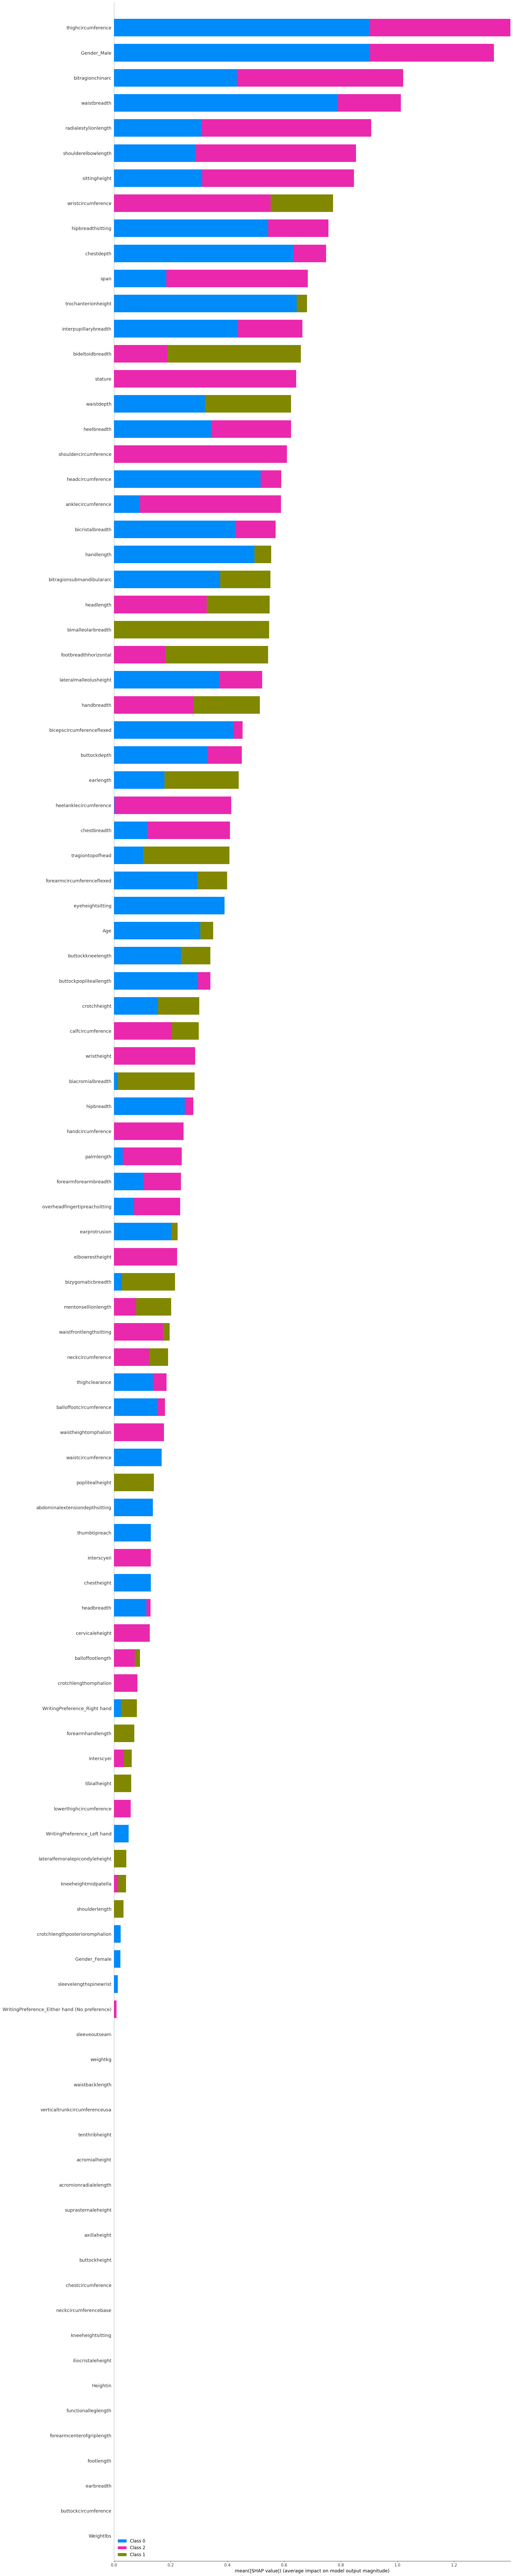

In [89]:
# SHAP values for test data 
import shap
explainer = shap.LinearExplainer(model_shap, x_test_trans)

shap_values = explainer.shap_values(x_test_trans)

shap.summary_plot(
    shap_values, max_display=300, feature_names=features, plot_size=(20, 100)
)
# shap asks for numpy 1.24 or lower.

# Since the shap values we get from X_test data may cause data_leakage.
# We will get the shap values from the train data below.

# Although it is recommended to use shap mostly with linear and tree-based models.
# You can get shap values in non-parametric models such as KNN and SVM.

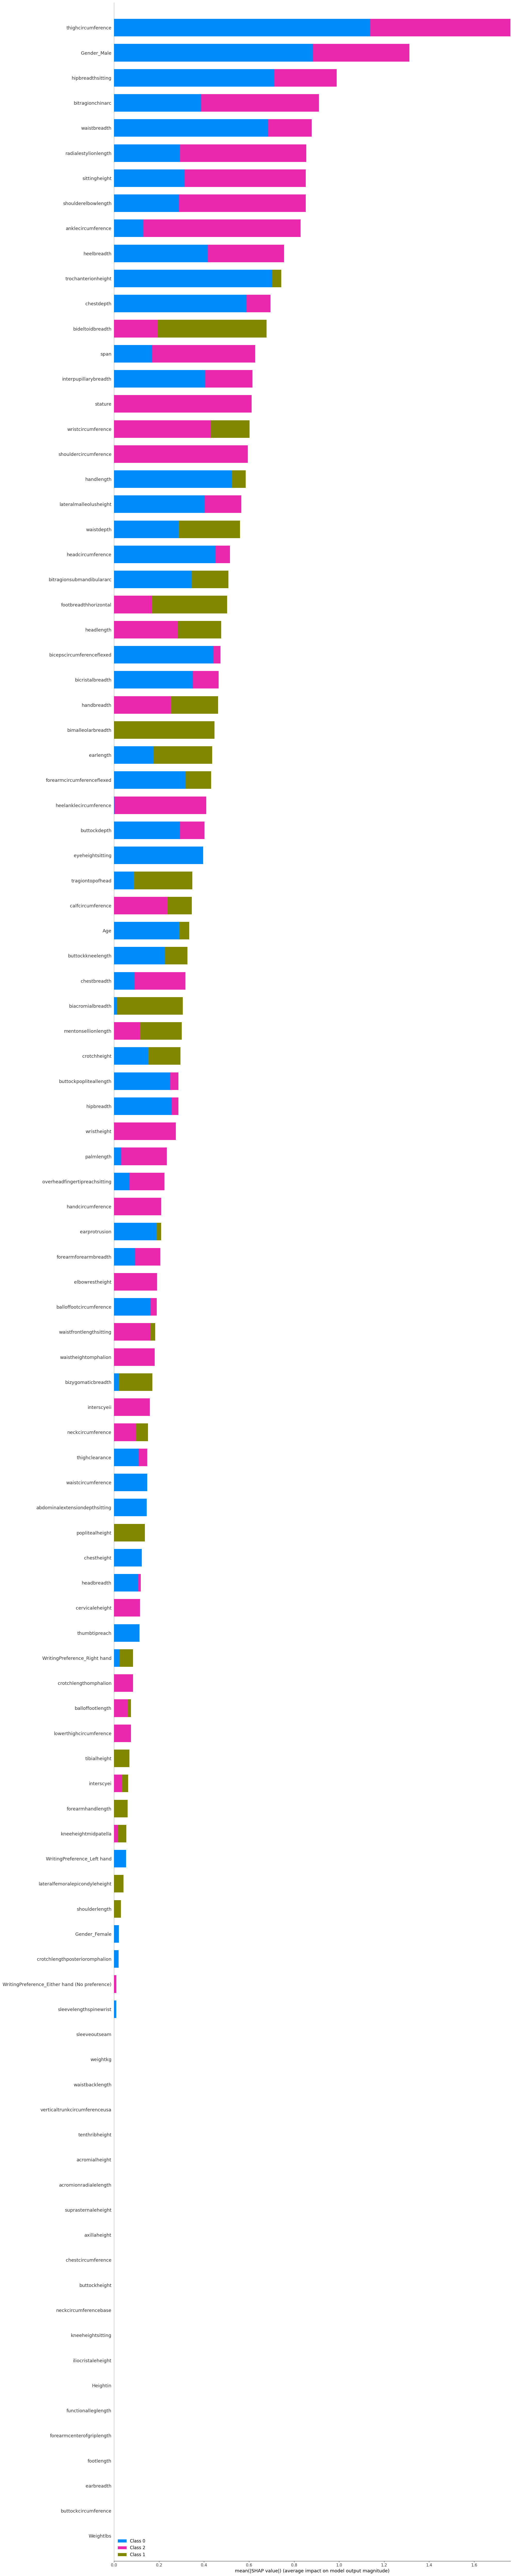

In [90]:
#SHAP values for features selection (train data)

shap_values = explainer.shap_values(x_train_trans)

shap.summary_plot(
    shap_values, max_display=300, feature_names=features, plot_size=(20, 100)
)


# blues black, pink white and green hispanic
# as you can see, there is no feature that contributes to the prediction of hispanic among
# the top 13 most important features.
# We choose 19 features that contribute to the predictions of hispanics.

In [95]:
hispanic = [
    "handlength",
    "forearmcircumferenceflexed",
    "headlength",
    "bitragionsubmandibulararc",
    "footbreadthhorizontal",
    "bimalleolarbreadth",
    "poplitealheight",
    "waistdepth",
    "WritingPreference",
    "tragiontopofhead",
    "bideltoidbreadth",
    "neckcircumferencebase",
    "biacromialbreadth",
    "buttockheight",
    "buttockkneelength",
    "earlength",
    "axillaheight",
    "Age",
]

In [96]:
X2 = X[hispanic]
X2.head()

,handlength,forearmcircumferenceflexed,headlength,bitragionsubmandibulararc,footbreadthhorizontal,bimalleolarbreadth,poplitealheight,waistdepth,WritingPreference,tragiontopofhead,bideltoidbreadth,neckcircumferencebase,biacromialbreadth,buttockheight,buttockkneelength,earlength,axillaheight,Age
0,193,299,206,291,101,71,437,240,Right hand,140,493,436,401,882,619,71,1347,41
1,195,289,201,320,98,67,417,225,Left hand,120,479,420,394,870,584,62,1293,35
2,203,357,202,330,103,75,431,255,Left hand,125,544,434,427,901,623,61,1327,42
3,194,318,199,309,106,73,393,205,Right hand,127,518,446,401,821,560,66,1239,31
4,218,324,197,310,111,80,523,214,Right hand,122,524,430,435,1080,706,56,1478,21


In [97]:
cat_new = X2.select_dtypes("object").columns
cat_new

Index(['WritingPreference'], dtype='object')

In [98]:
X2.shape

(5769, 18)

In [99]:
from sklearn.model_selection import train_test_split


X_train2, X_test2, y_train2, y_test2 = train_test_split(
    X2, y, test_size=0.2, random_state=101, stratify=y
)

In [100]:
column_trans_shap = make_column_transformer(
    (OneHotEncoder(handle_unknown="ignore", sparse_output=False), cat_new),
    remainder=MinMaxScaler(),
    verbose_feature_names_out=False,
)

operations_shap = [
    ("OneHotEncoder", column_trans_shap),
    (
        "log",
        LogisticRegression(
            class_weight="balanced",
            max_iter=10000,
            random_state=101,
            penalty="l1",
            solver="saga",
        ),
    ),
]

pipe_shap_model = Pipeline(steps=operations_shap)
pipe_shap_model.fit(X_train2, y_train2)

Pipeline(steps=[('OneHotEncoder',
                 ColumnTransformer(remainder=MinMaxScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  Index(['WritingPreference'], dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('log',
                 LogisticRegression(class_weight='balanced', max_iter=10000,
                                    penalty='l1', random_state=101,
                                    solver='saga'))])

In [102]:
eval(pipe_shap_model, X_train2, y_train2, X_test2, y_test2)

Test_Set
[[203  24  33]
 [ 19  87  30]
 [132 197 429]]
              precision    recall  f1-score   support

       Black       0.57      0.78      0.66       260
    Hispanic       0.28      0.64      0.39       136
       White       0.87      0.57      0.69       758

    accuracy                           0.62      1154
   macro avg       0.58      0.66      0.58      1154
weighted avg       0.74      0.62      0.65      1154


Train_Set
[[ 814   90  134]
 [  60  348  135]
 [ 444  842 1748]]
              precision    recall  f1-score   support

       Black       0.62      0.78      0.69      1038
    Hispanic       0.27      0.64      0.38       543
       White       0.87      0.58      0.69      3034

    accuracy                           0.63      4615
   macro avg       0.59      0.67      0.59      4615
weighted avg       0.74      0.63      0.66      4615



In [103]:
model = Pipeline(steps=operations_shap)

scores = cross_validate(
    model, X_train2, y_train2, scoring=scoring, cv=5, n_jobs=-1, return_train_score=True
)
df_scores = pd.DataFrame(scores, index=range(1, 6))
df_scores.mean()[2:]

test_precision_Hispanic     0.267445
train_precision_Hispanic    0.270310
test_f1_Hispanic            0.374670
train_f1_Hispanic           0.379093
test_recall_Hispanic        0.626164
train_recall_Hispanic       0.634448
dtype: float64

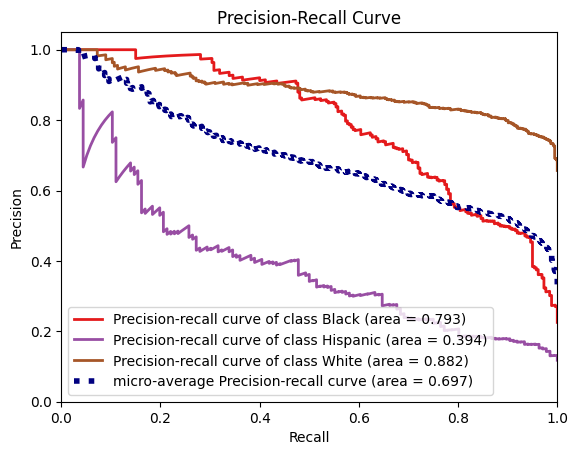

In [106]:
from scikitplot.metrics import plot_roc, precision_recall_curve ,plot_precision_recall

y_pred_proba = pipe_shap_model.predict_proba(X_test2)

plot_precision_recall(y_test2, y_pred_proba, cmap='Set1')
plt.show();